#### Retireving The Dataset

The dataset includes three sub-folders:
- deer
- cow
- coyote



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Edit this address so that it points to the dataset's zipped file on your Google Drive
!unzip -o -q "/content/drive/MyDrive/CV_PA1/PA1_PartB_datasets.zip" -d "/content/data/"

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# making all the necessary imports here
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.layers import Input,Activation,Dense,Flatten,Conv2D,MaxPooling2D,Dropout,AveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
# you may include more libraries here if needed

#### Binary Classification Task

In this task you will have to make a binary classifier using Keras which can distinguish between the following classes:
- cow
- deer

In [ ]:
### Edit Here ###
BATCH_SIZE = None # Initliaze this with an appropriate int value
#################
BATCH_SIZE = 200
SHAPE = (150,150,3)

In [ ]:
# defining and initializing batch generator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        brightness_range=(1,0.8),
        vertical_flip=True,
        rotation_range=10,
        horizontal_flip=True,validation_split=0.2)

In [ ]:
# defining and initilazing train set and validation set generators. You 'may' have to edit these paths in case of directory errors
train_generator = train_datagen.flow_from_directory(
        '/content/data/PA1_PartB_dataset/Binary_dataset',
        target_size=SHAPE[:-1],
        batch_size=BATCH_SIZE,
        class_mode='binary', subset="training")

validation_generator = train_datagen.flow_from_directory(
        '/content/data/PA1_PartB_dataset/Binary_dataset',
        target_size=SHAPE[:-1],
        batch_size=BATCH_SIZE,
        class_mode='binary', subset="validation")

Found 320 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [ ]:
# declare and initilalize your model here

model = None

### Code Here ###
model = Sequential()
model.add(Input(shape = SHAPE )) #input layer. 
model.add(Conv2D(filters = 32, kernel_size = (5,5) , strides = (2,2), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D( pool_size=(2,2), strides=(1,1) ))
model.add(Conv2D(filters = 32, kernel_size= (3,3), strides = (2,2), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D( pool_size=(2,2), strides=(1,1)))
model.add(Conv2D(filters = 16, kernel_size= (2,2), strides = (2,2), padding = 'valid', activation = 'relu'))
model.add(MaxPooling2D( pool_size=(2,2), strides=(1,1)))

model.add(Flatten())

model.add(Dense(500 , activation = 'relu')) #size and activation. "hidden layers "
model.add(Dense(300 , activation = 'relu')) #size and activation. "hidden layers "
model.add(Dense(200 , activation = 'relu')) #size and activation. "hidden layers "
model.add(Dense(50 , activation = 'relu')) #size and activation. "hidden layers "
model.add(Dense(1, activation = "sigmoid")) #output layer. 


#################

In [ ]:
# compiling your model with an optimizer and loss metric. You can change these parameters to tweak with your model's performance
adam = Adam(learning_rate = 1e-3)
model.compile(loss ="binary_crossentropy" , optimizer = adam, metrics = ['accuracy']) #loss = categorical cross entopy. 

In [ ]:
filepath="weights.best.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
callbacks_list = [checkpoint]

In [ ]:
# required baseline accuracy is 80%. Above that, the better the accuracy, the higher you will score

### Edit Here ###
EPOCH = 40 # Initliaze this with an appropriate int value
#################

hist = model.fit_generator(train_generator, epochs = EPOCH, validation_data = validation_generator, callbacks = callbacks_list)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
2/2 [==============================] - 11s 7s/step - loss: 0.6980 - accuracy: 0.4594 - val_loss: 0.6969 - val_accuracy: 0.5000

Epoch 00001: val_accuracy improved from -inf to 0.50000, saving model to weights.best.hdf5
Epoch 2/40
2/2 [==============================] - 7s 5s/step - loss: 0.6948 - accuracy: 0.5000 - val_loss: 0.6958 - val_accuracy: 0.5000

Epoch 00002: val_accuracy did not improve from 0.50000
Epoch 3/40
2/2 [==============================] - 7s 5s/step - loss: 0.7031 - accuracy: 0.5000 - val_loss: 0.6915 - val_accuracy: 0.6250

Epoch 00003: val_accuracy improved from 0.50000 to 0.62500, saving model to weights.best.hdf5
Epoch 4/40
2/2 [==============================] - 7s 4s/step - loss: 0.6971 - accuracy: 0.5000 - val_loss: 0.6886 - val_accuracy: 0.5000

Epoch 00004: val_accuracy did not improve from 0.62500
Epoch 5/40
2/2 [==============================] - 7s 4s/step - loss: 0.6886 - accuracy: 0.5000 - val_loss: 0.6879 - val_accuracy: 0.5000

Epoch 00005: v

In [ ]:
# save the model into and hdf5 file format
model.save(filepath)

In [ ]:
# testing the model using model.predict
predictions = model.predict(validation_generator, batch_size = BATCH_SIZE)
#print(predictions)

In [ ]:
# using the threshold, make your predictions binary

THRESHOLD = None

### Code here ###

THRESHOLD = 0.5
for i in range(len(predictions)):
  if (predictions[i] > THRESHOLD):
    predictions[i] = 1
  elif (predictions[i] <= THRESHOLD):
    predictions[i] = 0 


#################

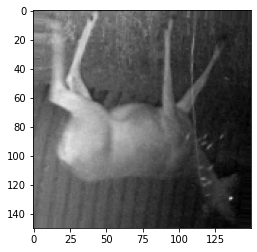

Original:  1.0
prediction:  [0.]


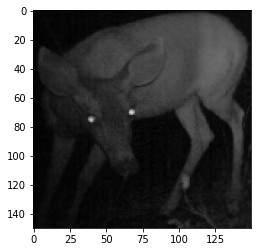

Original:  1.0
prediction:  [0.]


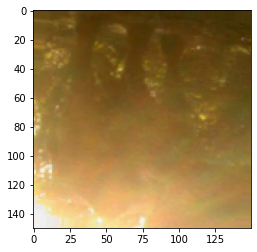

Original:  0.0
prediction:  [0.]


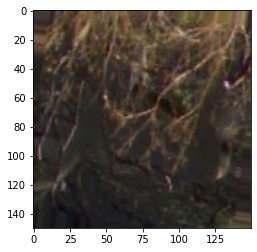

Original:  1.0
prediction:  [0.]


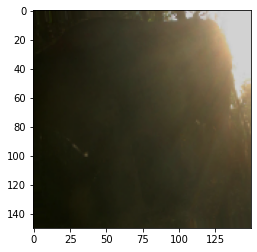

Original:  0.0
prediction:  [0.]


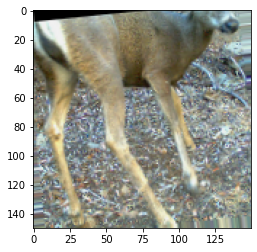

Original:  1.0
prediction:  [0.]


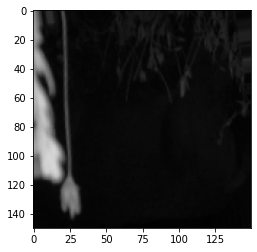

Original:  1.0
prediction:  [0.]


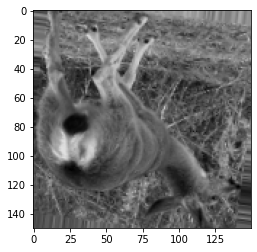

Original:  1.0
prediction:  [1.]


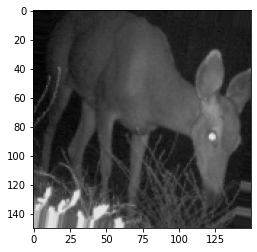

Original:  1.0
prediction:  [0.]


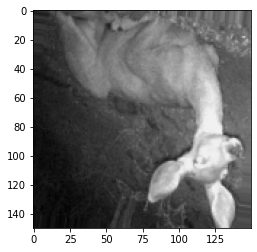

Original:  1.0
prediction:  [1.]


In [ ]:
# print a few images (at least 10) with their labels as given by your model to visualize your model's performance

### Code here ###
img = validation_generator[0]
x,y = img

for i in range(10):
  plt.imshow(x[i])
  plt.show()
  print("Original: ", y[i])
  print("prediction: ", predictions[i])
#################

#### Fining Tuning Your Model
Now you have to edit your model to learn three-class classification for the following classes:
- deer
- cow
- coyote


In [ ]:
# defining and initilazing train set and validation set generators. You 'may' have to edit these paths in case of directory errors
train_generator = train_datagen.flow_from_directory(
        '/content/data/PA1_PartB_dataset/Three_class_dataset',
        target_size=SHAPE[:-1],
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="training")

validation_generator = train_datagen.flow_from_directory(
        '/content/data/PA1_PartB_dataset/Three_class_dataset',
        target_size=SHAPE[:-1],
        batch_size=BATCH_SIZE,
        class_mode='categorical', subset="validation")

Found 480 images belonging to 3 classes.
Found 120 images belonging to 3 classes.


In [ ]:
# Freeze all the layers of the model except the dense layers in the end of model

### Code Here ###

#model.trainable = True 
#include_top = False
for layer in model.layers[:5]:
     layer.trainable = False

# for layer in model.layers:
#     print(layer, layer.trainable)

#################

In [ ]:
# Make a new Dense Layer (it should predict 3 classes now) and connect it to the second-last layer of network 

### Code Here ###
#model2= Model(inputs=model1.input, outputs=model1.layers[-2].output)
# layer = Dense(3, activation = 'softmax'
#type(model)
#model =  Dense(3, activation='relu')(model.layers[-2].output)
# #print('Using Keras version:', keras.__version__)
model.summary()
model.pop() #DONT run it again will cause problems
model.add(Dense(3, activation='softmax')) 
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 16)        2064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [ ]:
# Make a new model with the input of previous model as input and the new dense layer as output
new_model = None

### Code Here ###

new_model = model

#################

new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 73, 73, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 72, 72, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 35, 35, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 34, 34, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 17, 17, 16)        2064      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 16)        0         
_________________________________________________________________
flatten (Flatten)            (None, 4096)              0

In [ ]:
# compiling your model with an optimizer and loss metric. You can change these parameters to tweak with your model's performance
adam = Adam(learning_rate=1e-3)
new_model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

In [ ]:
checkpoint = ModelCheckpoint(filepath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'max')
callbacks_list = [checkpoint]

In [ ]:
# required baseline accuracy is 80%. Above that, the better the accuracy, the higher you will score

### Edit Here ###
EPOCH2 = 40  # Initliaze this with an appropriate int value
#################

hist2 = new_model.fit_generator(train_generator, epochs = EPOCH2, validation_data = validation_generator, callbacks = callbacks_list)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
3/3 [==============================] - 12s 4s/step - loss: 1.1751 - accuracy: 0.3125 - val_loss: 1.0728 - val_accuracy: 0.3583

Epoch 00001: val_accuracy improved from -inf to 0.35833, saving model to weights.best.hdf5
Epoch 2/40
3/3 [==============================] - 9s 3s/step - loss: 1.0100 - accuracy: 0.4583 - val_loss: 1.0197 - val_accuracy: 0.5000

Epoch 00002: val_accuracy improved from 0.35833 to 0.50000, saving model to weights.best.hdf5
Epoch 3/40
3/3 [==============================] - 9s 4s/step - loss: 0.9382 - accuracy: 0.5813 - val_loss: 0.9424 - val_accuracy: 0.5250

Epoch 00003: val_accuracy improved from 0.50000 to 0.52500, saving model to weights.best.hdf5
Epoch 4/40
3/3 [==============================] - 9s 3s/step - loss: 0.8671 - accuracy: 0.5813 - val_loss: 0.8873 - val_accuracy: 0.4917

Epoch 00004: val_accuracy did not improve from 0.52500
Epoch 5/40
3/3 [==============================] - 9s 3s/step - loss: 0.8251 - accuracy: 0.6313 - val_loss: 0.8924

In [ ]:
# save the model into and hdf5 file format
new_model.save(filepath)

In [ ]:
# testing the model using model.predict
new_predictions = new_model.predict(validation_generator, batch_size = BATCH_SIZE)  
#print( np.argmax(new_predictions[0]))
#type(new_predictions[0])
#print()


In [ ]:
# for each image, find the index of the highest prediction and use it to determine their label

### Code here ###
highest_pred = []
for i in range(len(new_predictions)):
  j = np.argmax( new_predictions[i])
  highest_pred.append(j)

#print(highest_pred)
#################

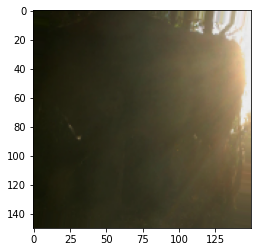

Original: cow
Original Label:  [1. 0. 0.]
Predicted Label:  2


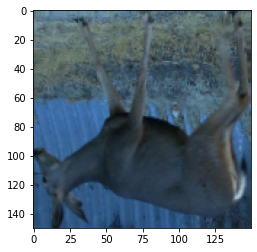

Original Deer
Original Label:  [0. 0. 1.]
Predicted Label:  0


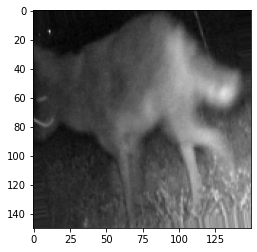

Original: coyote
Original Label:  [0. 1. 0.]
Predicted Label:  0


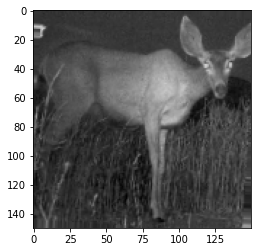

Original Deer
Original Label:  [0. 0. 1.]
Predicted Label:  2


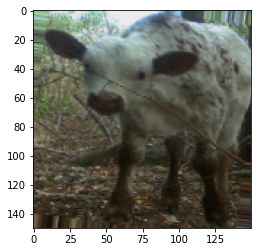

Original: cow
Original Label:  [1. 0. 0.]
Predicted Label:  2


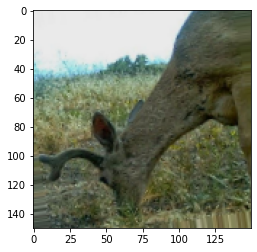

Original Deer
Original Label:  [0. 0. 1.]
Predicted Label:  0


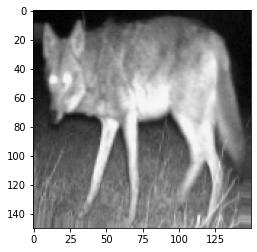

Original: coyote
Original Label:  [0. 1. 0.]
Predicted Label:  0


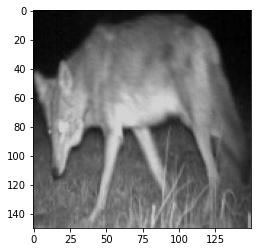

Original: coyote
Original Label:  [0. 1. 0.]
Predicted Label:  2


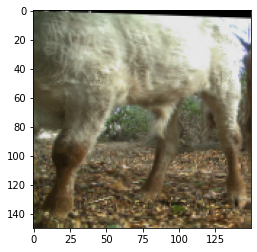

Original: cow
Original Label:  [1. 0. 0.]
Predicted Label:  2


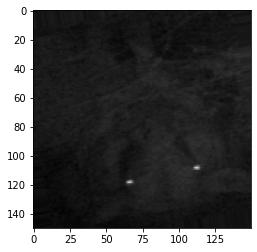

Original: cow
Original Label:  [1. 0. 0.]
Predicted Label:  0


In [ ]:
# print a few images (at least 10) with their labels as given by your model to visulaize your model's performance

### Code here ###
#use highest_pred var. 
from google.colab.patches import cv2_imshow
img = validation_generator[0]
x,y = img

for i in range(10):
  plt.imshow(x[i])
  plt.show()
  if (y[i][0] == 1):
    print("Original: cow")
  elif (y[i][1] == 1):
    print("Original: coyote")
  else:
    print("Original Deer")  
      
  print("Original Label: ", y[i])
  print("Predicted Label: ", highest_pred[i])

#################